# Submission - Inquisitive_Turtles

In [ ]:
import kagglehub
path = kagglehub.dataset_download("schran/insurance-premium-prediction")
print("Path to dataset files:", path)

In [ ]:
import pandas as pd
df = pd.read_csv('/kaggle/input/insurance-premium-prediction/Insurance Premium Prediction Dataset.csv')
print(df.columns,df.dtypes)

In [ ]:
df.describe()

In [ ]:
missing_values = df.isnull().sum()
cols_with_missing = missing_values[missing_values > 0]
print(cols_with_missing)

Getting rid of null values in target column

In [ ]:
df = df.dropna(subset = 'Premium Amount')

In [ ]:
missing_values = df.isnull().sum()
cols_with_missing = missing_values[missing_values > 0]
print(cols_with_missing)

In [ ]:
df.describe()

In [ ]:
Q1 = df['Previous Claims'].quantile(0.25)
Q3 = df['Previous Claims'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['Previous Claims'] >= lower_bound) & (df['Previous Claims'] <= upper_bound)]
df_outliers = df[(df['Previous Claims'] < lower_bound) | (df['Previous Claims'] > upper_bound)]

print('number of outliers: ',df_outliers['Previous Claims'].count())
print("Original DataFrame with outliers:",df['Previous Claims'].count())
print("DataFrame after removing outliers:",df_cleaned['Previous Claims'].count())

In [ ]:
df_cleaned.describe()

In [ ]:
mean_imputation_cols = ['Age','Number of Dependents','Credit Score','Credit Score']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

df_cleaned[mean_imputation_cols]= imputer.fit_transform(df_cleaned[mean_imputation_cols])
print(df_cleaned)



In [ ]:
df_cleaned.describe()

In [ ]:
missing_values = df_cleaned.isnull().sum()
check_missing = missing_values[missing_values > 0]
print(check_missing)

In [ ]:
mode_imputation_cols=['Annual Income','Health Score']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df_cleaned[mode_imputation_cols]= imputer.fit_transform(df_cleaned[mode_imputation_cols])
print(df_cleaned)


In [ ]:
missing_values = df_cleaned.isnull().sum()
check_missing = missing_values[missing_values > 0]
print(check_missing)

In [ ]:
mode_imputation_cols=['Marital Status','Occupation']

In [ ]:
df_cleaned.describe()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df_cleaned[mode_imputation_cols]= imputer.fit_transform(df_cleaned[mode_imputation_cols])
print(df_cleaned)


In [ ]:
missing_values = df_cleaned.isnull().sum()
check_missing = missing_values[missing_values > 0]
print(check_missing)

In [ ]:
df_cleaned['Customer Feedback']= df_cleaned['Customer Feedback'].fillna('')

In [ ]:
missing_values = df_cleaned.isnull().sum()
check_missing = missing_values[missing_values > 0]
print(check_missing)

In [ ]:
df_cleaned.dtypes

In [ ]:
df_cleaned.shape

In [ ]:
df_cleaned.describe()

# One Hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoding_cols=['Customer Feedback','Occupation','Education Level','Marital Status',
               'Property Type','Exercise Frequency','Smoking Status','Policy Type','Gender','Location']


encoder = OneHotEncoder(sparse=False)

#Fit and transform the encoding columns
encoded_array = encoder.fit_transform(df_cleaned[encoding_cols])

#Convert the encoded array to a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(encoding_cols))

# Drop original columns and concatenate encoded columns
df_cleaned = pd.concat([df_cleaned.drop(columns=encoding_cols), encoded_df], axis=1)

# Display the result
print(df_cleaned)

df_cleaned.columns



In [ ]:
df_cleaned.describe()

In [ ]:
df_cleaned.head(5)

In [ ]:
df_cleaned.dtypes

In [ ]:
df_cleaned = df_cleaned.dropna()

In [ ]:
df_cleaned.describe()

In [ ]:
missing_values = df_cleaned.isnull().sum()
check_missing = missing_values[missing_values > 0]
print(check_missing)

In [ ]:
df_cleaned.dtypes

In [ ]:
df_cleaned['Number of Dependents'].unique()

In [ ]:
df_cleaned['Number of Dependents'] = df_cleaned['Number of Dependents'].astype('int32')

In [ ]:
df_cleaned['Policy Start Date'] = df_cleaned['Policy Start Date'].astype('datetime64[ns]')

In [ ]:
df_cleaned.dtypes

In [ ]:
result = df_cleaned[np.isclose(df_cleaned['Customer Feedback_'],1.)]
print(result['Customer Feedback_'].count())

In [ ]:
df_cleaned.count()

In [ ]:
Annual Income,Health Score, Premium Amount

In [ ]:
df_cleaned['Annual Income'].unique()

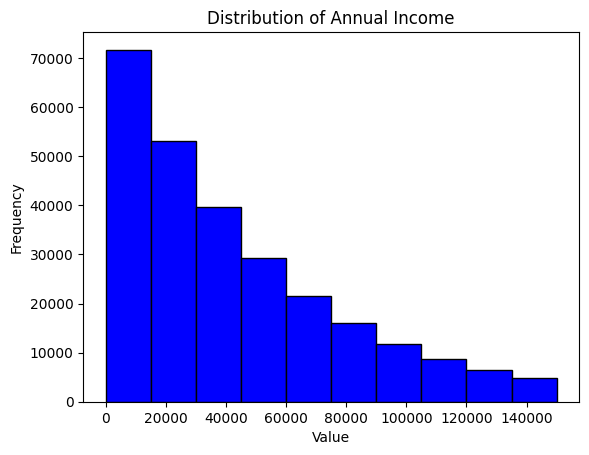

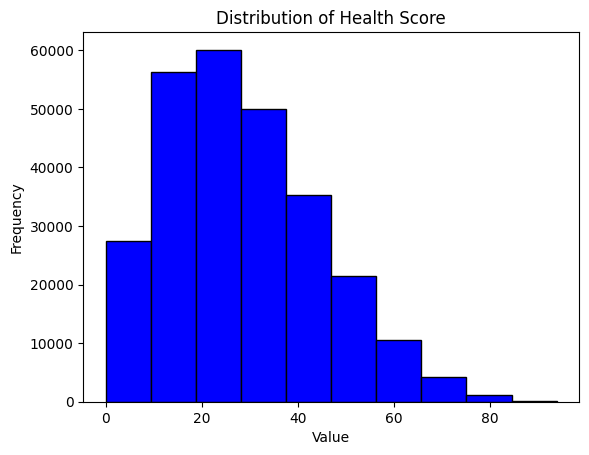

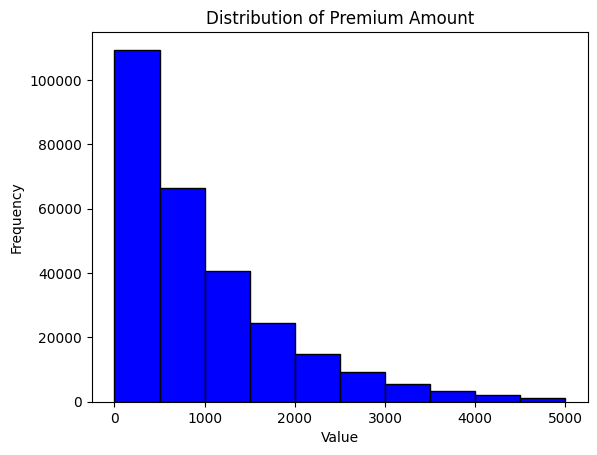

In [62]:
import matplotlib.pyplot as plt
bef=['Annual Income','Health Score','Premium Amount']
for i in range(len(bef)):
    plt.hist(df[bef[i]], bins=10, color='blue', edgecolor='black')
    plt.title(f'Distribution of {bef[i]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [60]:
df['Health_Score_log'] = df['Health Score'].apply(lambda x: np.sqrt(x))  # Add 1 to avoid log(0)
df['Annual_Income_log'] = df['Annual Income'].apply(lambda x: np.sqrt(x))  # Add 1 to avoid log(0)
df['Premium_Amount_Score_Log'] = df['Premium Amount'].apply(lambda x: np.sqrt(x))  # Add 1 to avoid log(0)


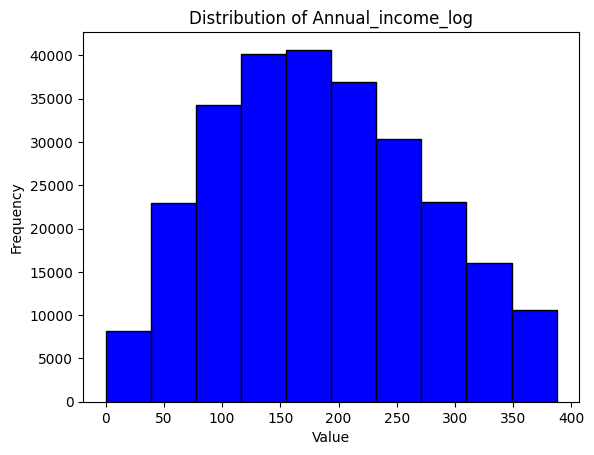

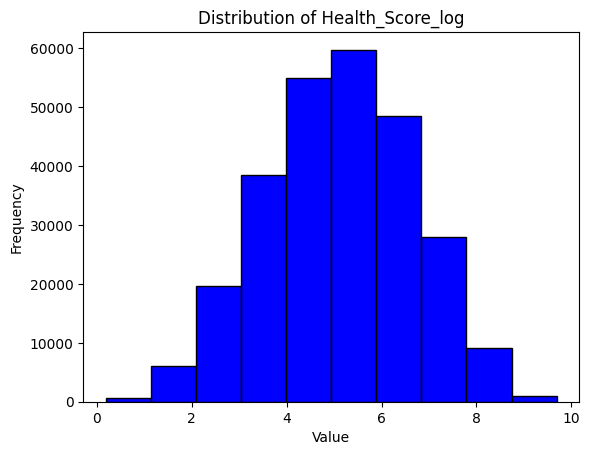

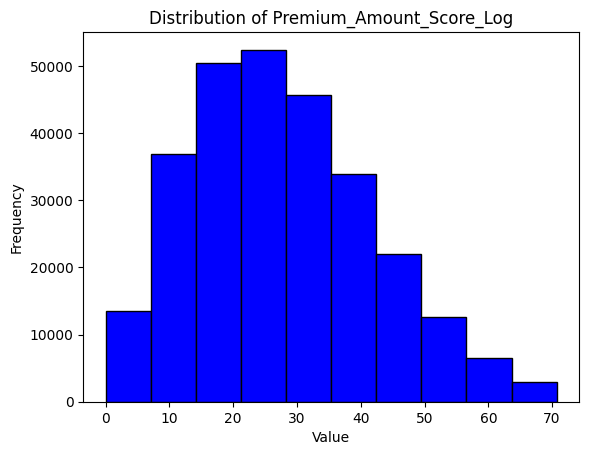

In [61]:
import matplotlib.pyplot as plt
aft=['Annual_income_log','Health_Score_log','Premium_Amount_Score_Log']
for i in range(len(aft)):
    plt.hist(df[aft[i]], bins=10, color='blue', edgecolor='black')
    plt.title(f'Distribution of {aft[i]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()